# <center /> The Price of Nice: 
## <center />Customer Service, Cognition, and Computation Linguistics

### <center /> Jason Quinley
### <center /> AFLAC Distribution Analytics Research Team
### <center /> Eberhard Karls Universit&auml;t T&uuml;bingen


### Were you nice this year? 
 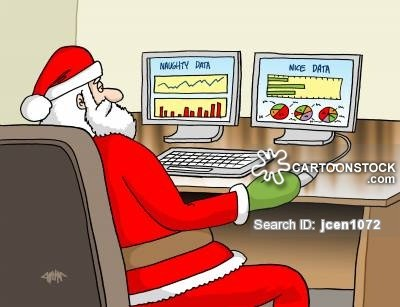

# Goals: 
### See How Data Science Gives Us Insight into Human Nature
### Improve Our Company Culture
### Broaden Machine Learning Knowledge
### Impact Data Science Community Nationwide

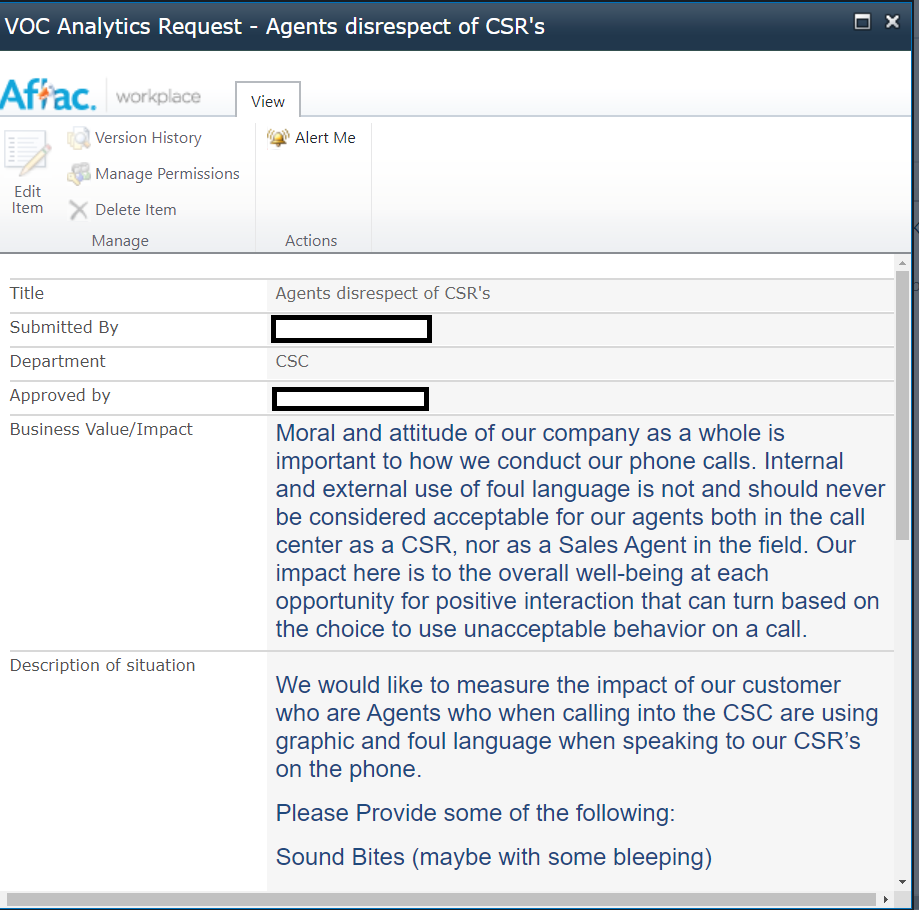

## At Issue for Companies:
- We have to use the proper "form"
- Companies want to avoid "toxic" workplace culture esp. w/ competitive job market


## Quiz: Which of these words do you know? 

- *Sp:* Gracias, Por Favor, Mariposa

- *Fr:* Merci, Si Vous Plait, Papillon

- *Ger:* Danke, Bitte, Schmetterling!


## Why Do I Care? 

### *Simply: Why does politeness exist?* 
### *And why does it seemingly pose a paradox?* 
### *And how could we say that one expression is **more** polite than another?*



### Politeness is a Human Universal 
- Not If; But Where and How? 
- Why? Inadequacy $\rightarrow$ Reciprocity
- Rational not Logical (Game Theory)

### Face (Direct) vs. Name (Indirect)
### Proto-Currency for Managing Inequality

# Let's Play a Game! 

## Study and Results
- Need place where people ask difficult questions
- Data is recorded
- Reputation matters
- Ex. Stanford Politeness Corpus (Database) and Cornell Politeness Classifier
- Wikipedia & Stack Exchange

### Original Study
- Took requests from Wikipedia 
- Parsed requests (sentence diagramming)
- Searched for Politeness Strategies to form vector (Checklist)
- Human annotators evaluated politeness
- Machine classified utterances according to strength of strategy
- Tested classifier on Stack Exchange

Ex. "Hello, Hamish :) Thank you for your answer! I'm sorry, I feel dumb :( 

I can't understand your solution (at all, I'm afraid :( ) Can you please tell me how to divide the 3 objects in 5 groups?"


```
Please                 1
Please_start           0
Indirect_(btw)         0
Hedges                 1
Factuality             0
Deference              0
Gratitude              1
Apologizing            1
1st_person_pl.         0
1st_person             1
1st_person_start       1
2nd_person             1
2nd_person_start       0
Indirect_(greeting)    1
Direct_question        0
Direct_start           0
SUBJUNCTIVE            0
INDICATIVE             1
HASHEDGE               1
HASPOSITIVE            1
HASNEGATIVE            1
```

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import convokit
from convokit import Corpus, User, Utterance, Parser, PolitenessStrategies

print(convokit.__file__)

from pandas import DataFrame
from typing import List, Dict, Set

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#Allow Multiple Outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\Jason\.conda\envs\Convo37\lib\site-packages\convokit\__init__.py


In [2]:
df=pd.read_csv(r'Wiki_Trained_Stack_Clean.csv')
df.head(2)


,Community,Timestamp,UserId,Reputation,Upvotes,Downvotes,parsed,Please,Please_start,Indirect_(btw),...,2nd_person_start,Indirect_(greeting),Direct_question,Direct_start,SUBJUNCTIVE,INDICATIVE,HASHEDGE,HASPOSITIVE,HASNEGATIVE,Score
0,Home Improvement,2010-07-21-19:53:52,58,593.0,76.0,1.0,What type of hammers? What type of screw drivers?,0,0,0,...,0,0,1,0,0,0,0,0,0,0.077506
1,Apple,2010-08-17-20:55:54,77,1069.0,23.0,2.0,"Stating which model of MBP you have will help,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0.271926


In [14]:
pol_strats=['Please', 'Please_start', 'Indirect_(btw)',
       'Hedges', 'Factuality', 'Deference', 'Gratitude', 'Apologizing',
       '1st_person_pl.', '1st_person', '1st_person_start', '2nd_person',
       '2nd_person_start', 'Indirect_(greeting)', 'Direct_question',
       'Direct_start', 'SUBJUNCTIVE', 'INDICATIVE', 'HASHEDGE', 'HASPOSITIVE',
       'HASNEGATIVE']

In [15]:
df.loc[df['Score']==df['Score'].max()]
df.loc[211597][pol_strats]

,Community,Timestamp,UserId,Reputation,Upvotes,Downvotes,parsed,Please,Please_start,Indirect_(btw),...,2nd_person_start,Indirect_(greeting),Direct_question,Direct_start,SUBJUNCTIVE,INDICATIVE,HASHEDGE,HASPOSITIVE,HASNEGATIVE,Score
211597,Stack Overflow,2011-01-30-15:38:42,498735,89.0,3.0,0.0,"Hello, Hamish :) Thank you for your answer! I'...",1,0,0,...,0,1,0,0,0,1,1,1,1,1.0


Please                 1
Please_start           0
Indirect_(btw)         0
Hedges                 1
Factuality             0
Deference              0
Gratitude              1
Apologizing            1
1st_person_pl.         0
1st_person             1
1st_person_start       1
2nd_person             1
2nd_person_start       0
Indirect_(greeting)    1
Direct_question        0
Direct_start           0
SUBJUNCTIVE            0
INDICATIVE             1
HASHEDGE               1
HASPOSITIVE            1
HASNEGATIVE            1
Name: 211597, dtype: object

In [4]:
df.columns

Index(['Community', 'Timestamp', 'UserId', 'Reputation', 'Upvotes',
       'Downvotes', 'parsed', 'Please', 'Please_start', 'Indirect_(btw)',
       'Hedges', 'Factuality', 'Deference', 'Gratitude', 'Apologizing',
       '1st_person_pl.', '1st_person', '1st_person_start', '2nd_person',
       '2nd_person_start', 'Indirect_(greeting)', 'Direct_question',
       'Direct_start', 'SUBJUNCTIVE', 'INDICATIVE', 'HASHEDGE', 'HASPOSITIVE',
       'HASNEGATIVE', 'Score'],
      dtype='object')

So what's *under the hood*? Ex. Gratitude & Deference
```
gratitude = lambda p: getleft(p).startswith("thank") or getright(p).startswith("thank") 
    or "(appreciate, i)" in remove_numbers(p).lower()  
gratitude.__name__ = "Gratitude"
```
```
deference = lambda p: (getleftpos(p) == 1 and getleft(p) in ["great","good","nice","good","interesting","cool","excellent","awesome"]) or (getrightpos(p) == 1 and getright(p) in     ["great","good","nice","good","interesting","cool","excellent","awesome"])
deference.__name__ = "Deference"
```


### Politeness Strategies
```pol_strats=['Please', 'Please_start', 'Indirect_(btw)', 'Hedges', 'Factuality', 'Deference', 'Gratitude', 'Apologizing','1st_person_pl.', '1st_person', '1st_person_start', '2nd_person', '2nd_person_start', 'Indirect_(greeting)', 'Direct_question', 'Direct_start', 'SUBJUNCTIVE', 'INDICATIVE', 'HASHEDGE', 'HASPOSITIVE', 'HASNEGATIVE']
```

In [6]:
pol_strats=['Please', 'Please_start', 'Indirect_(btw)', 'Hedges', 'Factuality', 'Deference', 'Gratitude', 'Apologizing','1st_person_pl.', '1st_person', '1st_person_start', '2nd_person', '2nd_person_start', 'Indirect_(greeting)', 'Direct_question', 'Direct_start', 'SUBJUNCTIVE', 'INDICATIVE', 'HASHEDGE', 'HASPOSITIVE', 'HASNEGATIVE']
df1=df.sample(frac=.01)
comm_strat=df1.pivot_table( index= 'Community',values=pol_strats , aggfunc=np.mean )
comm_score=df1.pivot_table( index= 'Community',values='Score' , aggfunc=np.mean )

sf=pd.merge(comm_score,comm_strat, on = 'Community').reset_index()


sf.head(2)

,Community,Score,1st_person,1st_person_pl.,1st_person_start,2nd_person,2nd_person_start,Apologizing,Deference,Direct_question,...,HASHEDGE,HASNEGATIVE,HASPOSITIVE,Hedges,INDICATIVE,Indirect_(btw),Indirect_(greeting),Please,Please_start,SUBJUNCTIVE
0,Android Enthusiasts,0.301874,0.333333,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.666667,0.666667,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0
1,Apple,0.500268,0.500000,0.0,0.5,0.000000,0.5,0.0,0.0,0.0,...,1.000000,0.000000,0.5,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
corr_list=[]
for strat in pol_strats:
    #np.corrcoef(df1[strat],df1['Score'])[0][1]
    x=np.round(100*np.corrcoef(sf['Score'],sf[strat])[0][1])
    #x
    corr_list.append(x)
cf=pd.DataFrame( columns=pol_strats)
cf.loc[0]=np.array(corr_list)
cf



,Please,Please_start,Indirect_(btw),Hedges,Factuality,Deference,Gratitude,Apologizing,1st_person_pl.,1st_person,...,2nd_person,2nd_person_start,Indirect_(greeting),Direct_question,Direct_start,SUBJUNCTIVE,INDICATIVE,HASHEDGE,HASPOSITIVE,HASNEGATIVE
0,-3.0,-14.0,-5.0,23.0,-5.0,34.0,27.0,-12.0,-3.0,38.0,...,-16.0,3.0,49.0,-44.0,-46.0,41.0,-23.0,35.0,57.0,-68.0


In [8]:
wf=pd.read_csv(r'SVM_Weights_Wiki_Trained.csv')
wf=wf.drop('Unnamed: 0', axis=1)
wf1=wf.T.reset_index()
wf1.columns=['Strategy', 'Weight']
wf1=wf1.sort_values('Weight', ascending=0)
wf1.head(2)

,Strategy,Weight
10,Gratitude,1.219151
17,Indirect_(greeting),0.880021


,Strategy,>50%,<50%,Yes Frac,No Frac,Yes to No Frac,Yes to All Frac,No to All Frac
15,Gratitude,237,16,0.266592,0.005904,45.153965,0.065325,0.004410
5,Indirect_(greeting),32,6,0.035996,0.002214,16.257968,0.008820,0.001654
11,SUBJUNCTIVE,105,29,0.118110,0.010701,11.037198,0.028942,0.007993
7,Please,41,15,0.046119,0.005535,8.332208,0.011301,0.004135
4,Deference,26,12,0.029246,0.004428,6.604799,0.007166,0.003308
1,Indirect_(btw),2,1,0.002250,0.000369,6.096738,0.000551,0.000276
17,1st_person_start,401,267,0.451069,0.098524,4.578262,0.110529,0.073594
14,Hedges,203,150,0.228346,0.055351,4.125459,0.055954,0.041345
12,INDICATIVE,113,144,0.127109,0.053137,2.392123,0.031147,0.039691
16,HASHEDGE,376,536,0.422947,0.197786,2.138408,0.103638,0.147740


<Figure size 1080x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

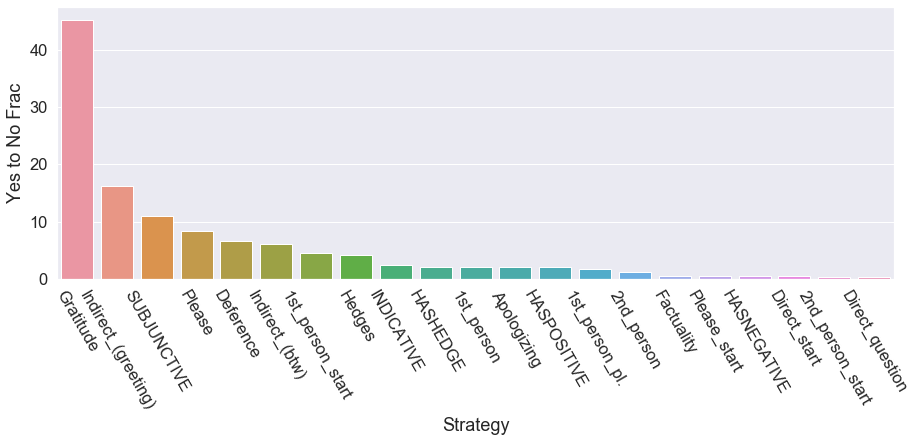

In [16]:
strat_counts=pd.DataFrame(df1[pol_strats].sum().rename_axis('Strategy').rename('Sum').reset_index())
strat_counts_no=pd.DataFrame(df1[pol_strats][df1['Score']<.5].sum().rename_axis('Strategy').rename('<50%').reset_index())
strat_counts_yes=pd.DataFrame(df1[pol_strats][df1['Score']>.5].sum().rename_axis('Strategy').rename('>50%').reset_index()).sort_values('>50%')

yes_no=strat_counts_yes.merge(strat_counts_no, on='Strategy')
yes_no['Yes Frac']= yes_no['>50%']/len(df1[pol_strats][df1['Score']>.5])
yes_no['No Frac']= yes_no['<50%']/len(df1[pol_strats][df1['Score']<.5])
#yes_no['Yes to No']= yes_no['>50%']/yes_no['<50%']
yes_no['Yes to No Frac']= yes_no['Yes Frac']/yes_no['No Frac']
yes_no['Yes to All Frac']= yes_no['>50%']/len(df1)
yes_no['No to All Frac']= yes_no['<50%']/len(df1)
#yes_no['Percent Diff']=

yes_no=yes_no.sort_values('Yes to No Frac', ascending=0)
yes_no
plt.figure(figsize=(15,5))
sb.barplot(x=yes_no['Strategy'], y = yes_no['Yes to No Frac'])
plt.xticks(rotation=-60)

<Figure size 1080x360 with 0 Axes>

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

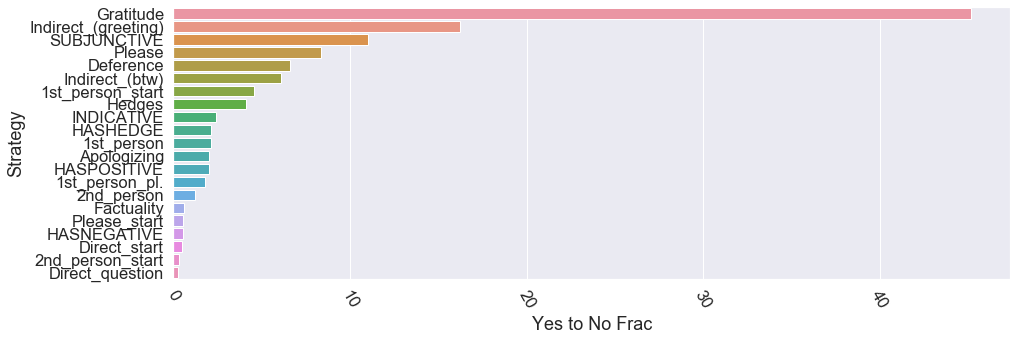

In [17]:
plt.figure(figsize=(15,5))
sb.barplot(y=yes_no['Strategy'], x = yes_no['Yes to No Frac'])
plt.xticks(rotation=-60)

Text(0.5, 0, '')

Text(0.5, 0, '')

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Politeness Score Over 50% vs. General Population')

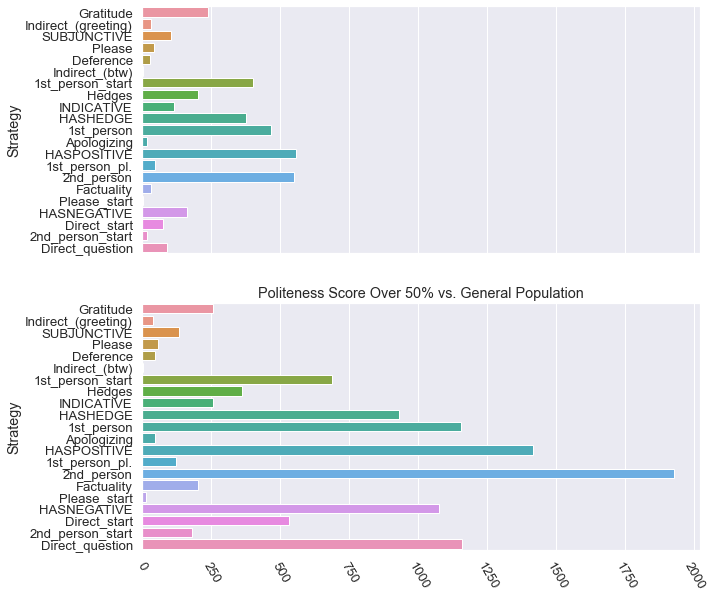

In [20]:
# Show in NB
sb.set(font_scale=1.2)
# Yes to Total to Yes/No
fig,axs=plt.subplots(2,1,figsize=(10,10), sharex=True)
strat_order=yes_no['Strategy'].to_list()

#sb.barplot(data=strat_counts_no, x='Strategy', y='<50%' , ax=axs[0] , order=strat_order)
sb.barplot(data=strat_counts_yes, y='Strategy',x='>50%', ax=axs[0] , order=strat_order)
sb.barplot(data=strat_counts, y='Strategy', x= 'Sum', ax=axs[1], order=strat_order)
for ax in axs:
    ax.set_xlabel('')
plt.xticks(rotation=-60)

plt.title('Politeness Score Over 50% vs. General Population')
fig.savefig('Pol_Total.png')
plt.show()

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Correlations on Strategies with Score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

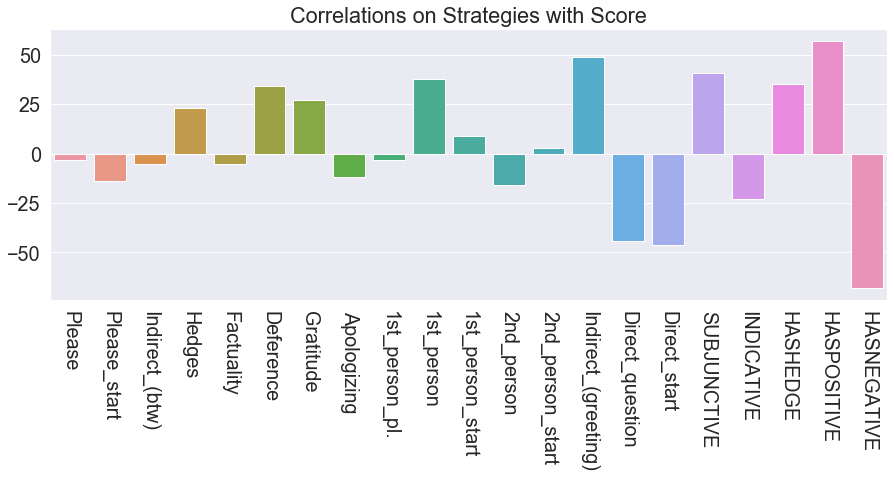

In [10]:
# Show in NB
sb.set(font_scale=1.8)
plt.figure(figsize=(15,5))
plt.title('Correlations on Strategies with Score')
sb.barplot(data=cf)
plt.xticks(rotation=-90)

,Strategy,>50%,<50%,Yes Frac,No Frac,Yes to No Frac,Yes to All Frac,No to All Frac
15,Gratitude,237,16,0.266592,0.005904,16.762493,0.065325,0.004410
11,SUBJUNCTIVE,105,29,0.118110,0.010701,5.705503,0.028942,0.007993


<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Strategic Usage Comparing Polite to Impolite')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

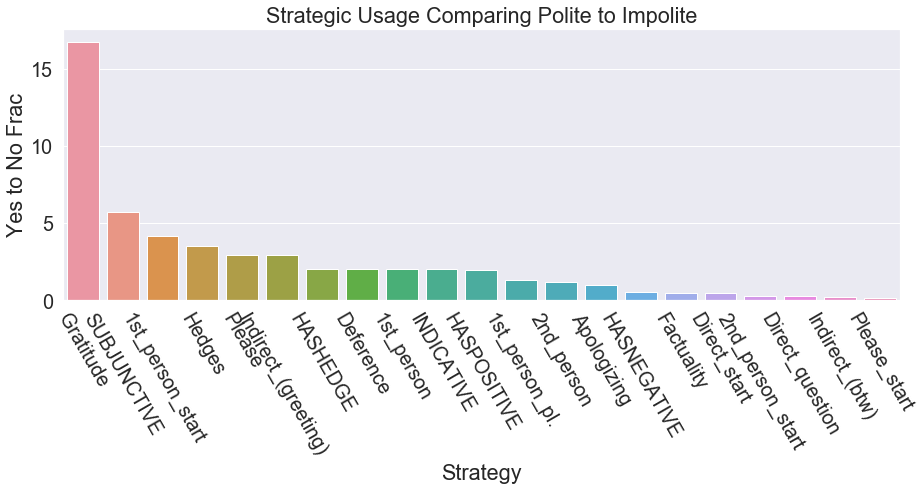

In [11]:
# Show in NB
strat_counts=pd.DataFrame(df1[pol_strats].sum().rename_axis('Strategy').rename('Sum').reset_index())
strat_counts_no=pd.DataFrame(df1[pol_strats][df1['Score']<.5].sum().rename_axis('Strategy').rename('<50%').reset_index())
strat_counts_yes=pd.DataFrame(df1[pol_strats][df1['Score']>.5].sum().rename_axis('Strategy').rename('>50%').reset_index()).sort_values('>50%')

yes_no=strat_counts_yes.merge(strat_counts_no, on='Strategy')
yes_no['Yes Frac']= yes_no['>50%']/len(df1[pol_strats][df1['Score']>.5])
yes_no['No Frac']= yes_no['<50%']/len(df1[pol_strats][df1['Score']<.5])
#yes_no['Yes to No']= yes_no['>50%']/yes_no['<50%']
yes_no['Yes to No Frac']= yes_no['Yes Frac']/(yes_no['No Frac']+.01)
yes_no['Yes to All Frac']= yes_no['>50%']/len(df1)
yes_no['No to All Frac']= yes_no['<50%']/len(df1)
#yes_no['Percent Diff']=

yes_no=yes_no.sort_values('Yes to No Frac', ascending=0)
yes_no.head(2)
plt.figure(figsize=(15,5))
plt.title('Strategic Usage Comparing Polite to Impolite')
sb.barplot(x=yes_no['Strategy'], y = yes_no['Yes to No Frac'])
plt.xticks(rotation=-60)

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 0, '')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

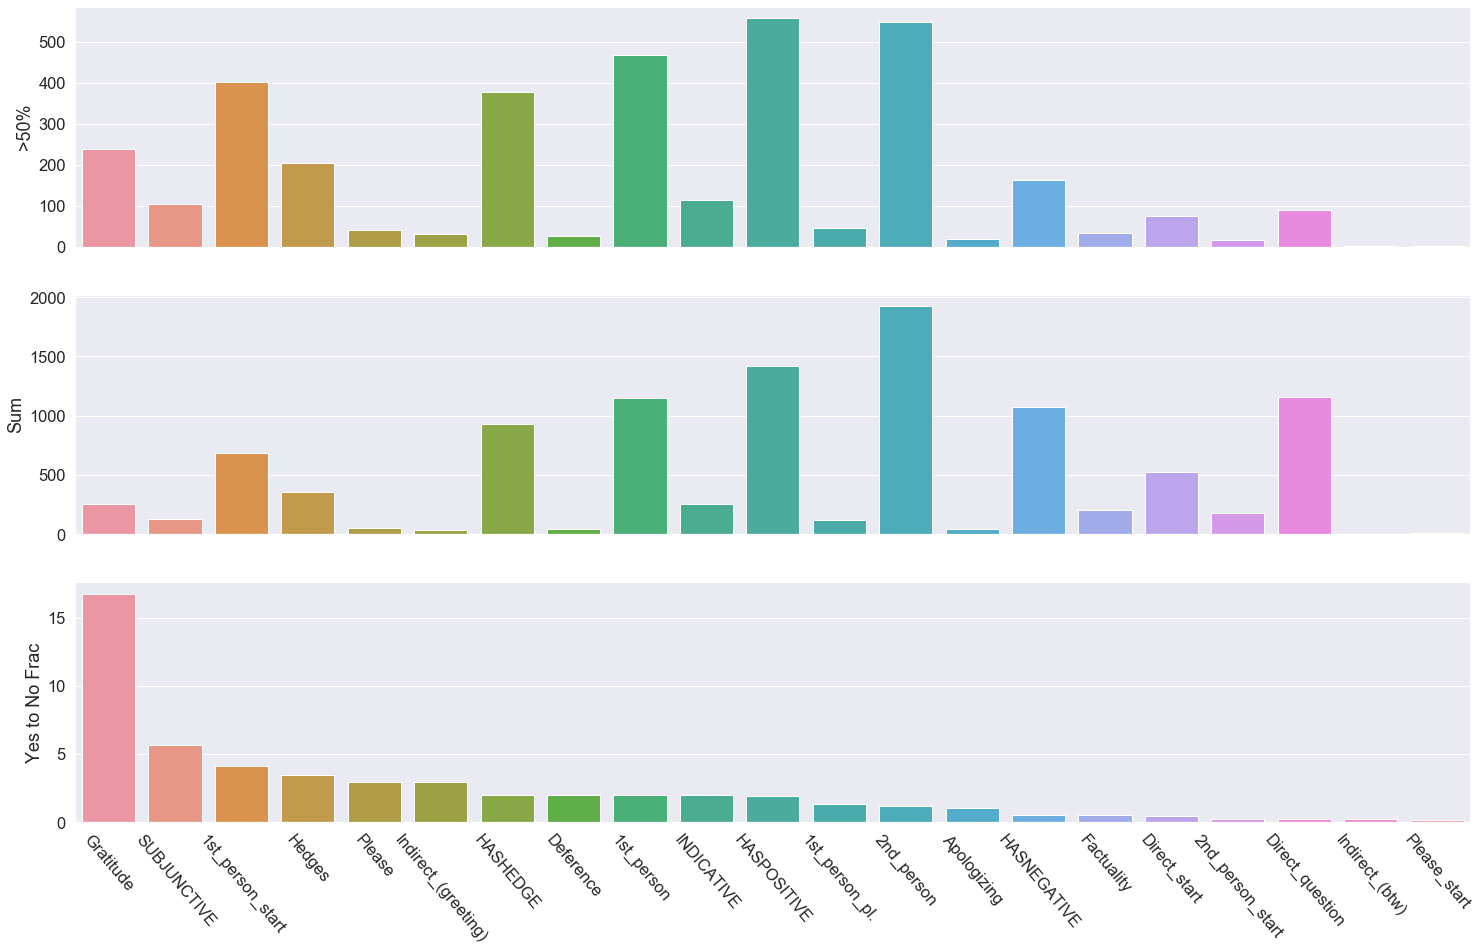

In [12]:
# Show in NB'; Compare Polite to Impolite (Code Live)
sb.set(font_scale=1.5)
# Yes to Total to Yes/No
fig,axs=plt.subplots(3,1,figsize=(25,15), sharex=True)
strat_order=yes_no['Strategy'].to_list()

#sb.barplot(data=strat_counts_no, x='Strategy', y='<50%' , ax=axs[0] , order=strat_order)
sb.barplot(data=strat_counts_yes, x='Strategy',y='>50%', ax=axs[0] , order=strat_order)
sb.barplot(data=strat_counts, x='Strategy', y= 'Sum', ax=axs[1], order=strat_order)

sb.barplot(data=yes_no, x='Strategy', y = 'Yes to No Frac', ax=axs[2])

for ax in axs:
    ax.set_xlabel('')
plt.xticks(rotation=-50)

Text(0, 0.5, 'SVM Weights')

Text(0.5, 0, '')

Text(0.5, 0, '')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

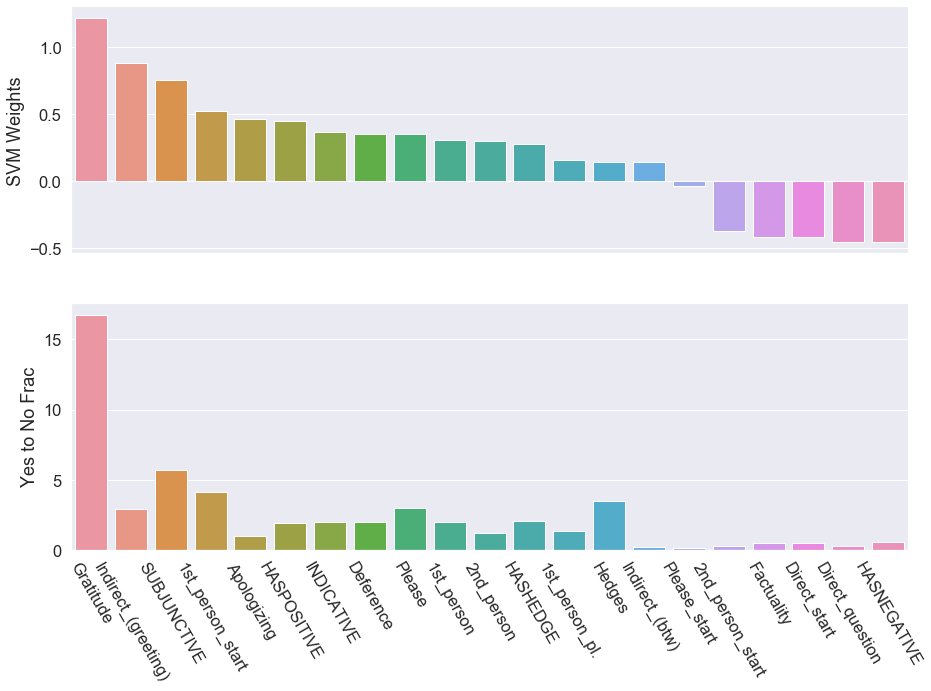

In [13]:
# Compare Polite-Impolite Fraction to SVM (Code Live)
fig,axs=plt.subplots(2,1,figsize=(15,10), sharex=True)
weight_order=wf1['Strategy'].to_list()

sb.barplot(data=wf, ax=axs[0] , order=weight_order)
sb.barplot(data=yes_no,  ax=axs[1] ,x='Strategy', y = 'Yes to No Frac', order=weight_order)
axs[0].set_ylabel('SVM Weights')

for ax in axs:
    ax.set_xlabel('')
plt.xticks(rotation=-60)

## Lesson: Getting what you wouldn't normally have means  saying things others wouldn't normally say. 

## Machine Learning: 

So how does a machine "think" about this?
- Convokit annotates features
- Humans evaluate politeness rating
- Ratings are ranked; upper quartile "polite" and bottom quartile "impolite"
- Train Machine Learning Model (ex. Support Vector Machine) 
- Model maximizes "distance" between classes

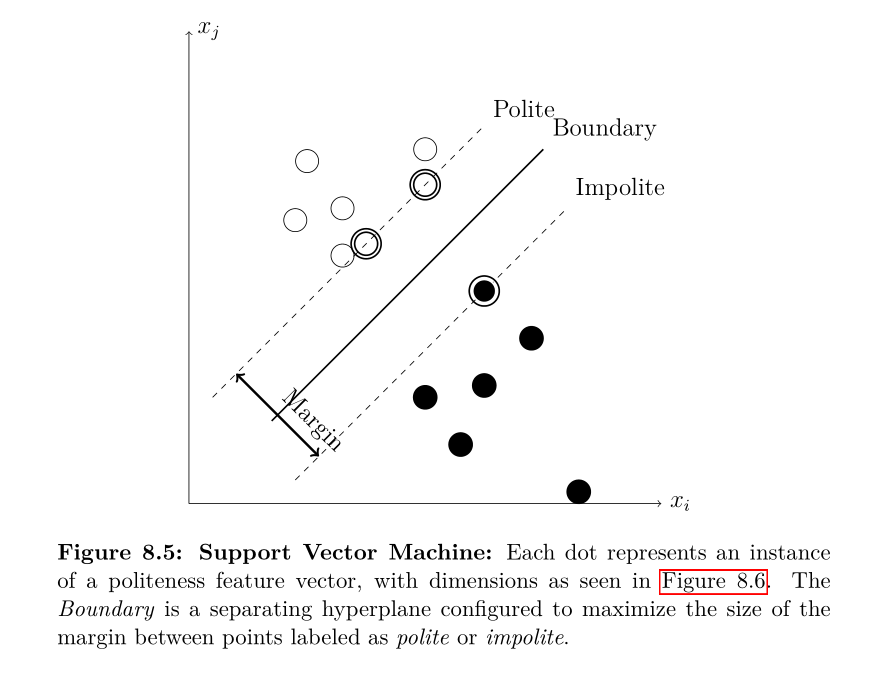

# Repeated Games and Reputations: 
## My work involves models of interactions called *Trust Games*
## The Evolution of Trust (ncase.me/trust)

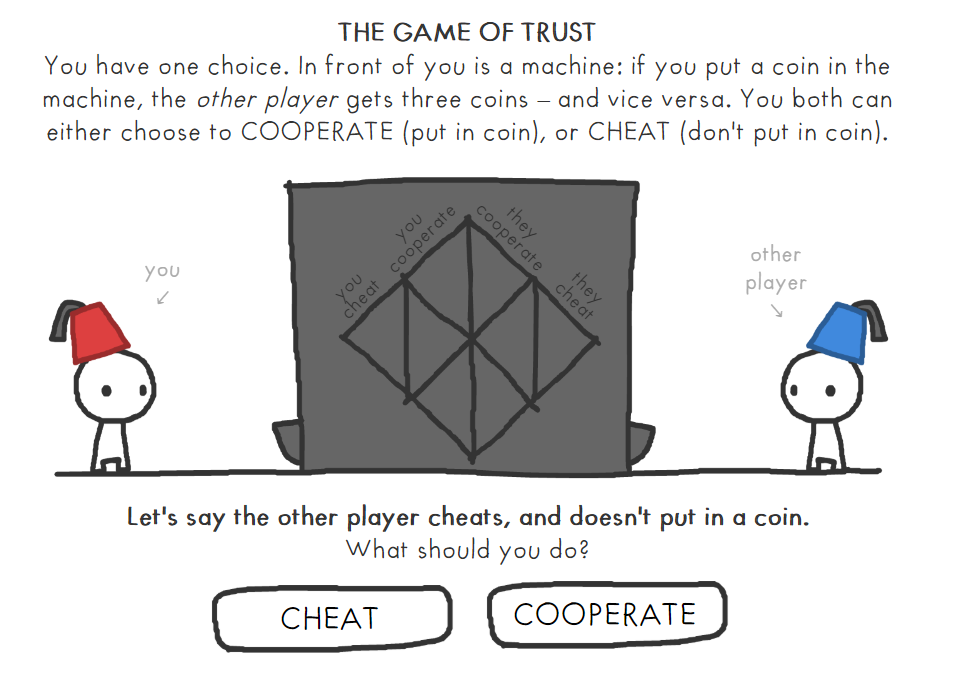



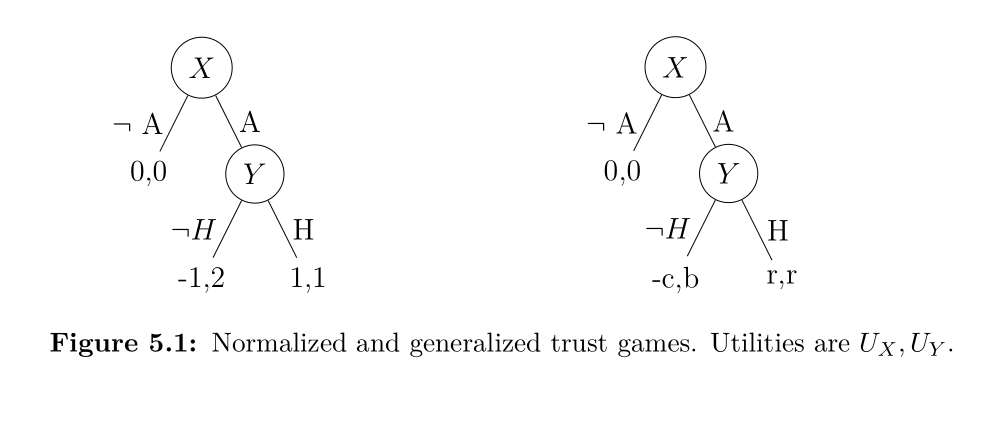


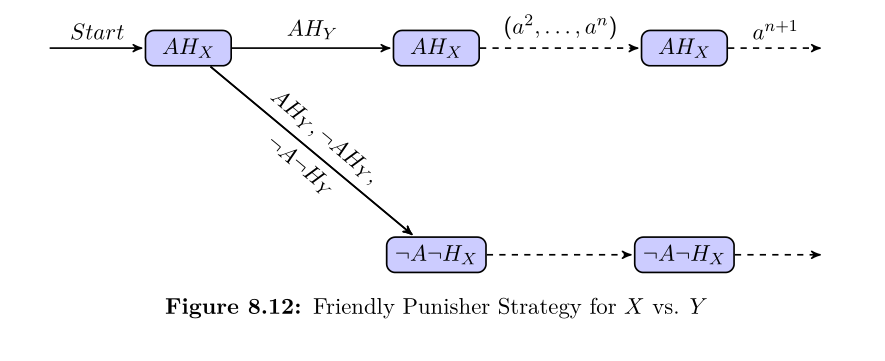

## Lessons from Game-Theoretic Modeling:
- Cooperation succeeds with 
    - Repetition & Potential for Future Cooperation
    - Potential Reputation Gain/Loss
    - Sympathy
    - Costly Speech
- Tie-In to Data: More Heavily Weighted Strategies Correspond to These Properties
- Irony: Fragility of Politeness in the Short-Term is its Strength in the Long-Term
- Reciprocity and Reputation Create Win-Win from Zero-Sum

## Conclusion:
- Not all words are created equal
- We're a tribal species: using the right words can expand your tribe
- Machine Learning can help us detect patterns that we may not see because they're so common
- As competition for talent increases along with economic uncertainty, how do we keep a handle on toxic workplace culture? HR has a gold mine in YOU, the data science professional
- Programmers are people too! Much of the success in this project is because I reached out to the authors of the code (and made sure to thank them!) Are we patronizing the open-source community?


Special Thanks to: 

- Data Science Meetup 
- AFLAC
- Linguistics Conference of UGA
- T&uuml;bingen Linguistics (Gerhard, Roland, Michael)
- Cornell Information Science